# Data Project - Stock Market Analysis


Here I will be using Pandas  to get stock information and to visualize different aspects of it. Also, I will be analyzing the risk of a stock based on its previous performance history.

Questions to be answered:
1) What was the change in price of the stock over time?
2) What was the daily return of the stock on average?
3) What was the moving average of the various stocks?
4) What was the correlation between different stocks' closing prices?
5) How much value do we put at risk by investing in a particular stock?


In [37]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

%matplotlib inline

In [2]:
from pandas_datareader import DataReader
from datetime import datetime

In [3]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

In [25]:
tech_list = 'AAPL GOOG MSFT AMZN FB'.split()
tech_list

['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB']

In [22]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [26]:
for stock in tech_list:
    globals()[stock] = data.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [24]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-13,822.140015,826.380005,821.440002,823.559998,823.559998,1122400
2017-04-17,825.010010,837.750000,824.469971,837.169983,837.169983,895000
2017-04-18,834.219971,838.929993,832.710022,836.820007,836.820007,836700
2017-04-19,839.789978,842.219971,836.289978,838.210022,838.210022,954200
2017-04-20,841.440002,845.200012,839.320007,841.650024,841.650024,959000


In [14]:
!pip install fix_yahoo_finance

In [17]:
import sys
sys.executable

'C:\\Users\\marga\\Anaconda3\\python.exe'

In [31]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-13,141.910004,142.380005,141.050003,141.050003,138.853424,17822900
2017-04-17,141.479996,141.880005,140.869995,141.830002,139.621262,16582100
2017-04-18,141.410004,142.039993,141.110001,141.199997,139.001068,14697500
2017-04-19,141.880005,142.000000,140.449997,140.679993,138.489166,17328400
2017-04-20,141.220001,142.919998,141.160004,142.440002,140.221771,23319600


In [32]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,161.457817,162.715556,160.197263,161.476548,160.389939,2.985332e+07
std,11.123184,11.295790,11.051618,11.130115,11.694069,1.228883e+07
min,141.220001,141.880005,140.449997,140.679993,138.489166,1.402670e+07
25%,153.622505,154.160000,152.362503,153.324997,151.668259,2.126205e+07
50%,160.105004,161.550003,158.760002,160.029999,158.825920,2.633415e+07
75%,172.362500,173.494995,171.037495,172.222500,171.538109,3.508818e+07
max,182.589996,183.500000,180.210007,181.720001,181.720001,8.659380e+07


In [33]:
# Adjusted Closing price takes into account any changes in the price of the stock

In [34]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-04-13 to 2018-04-13
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int32
dtypes: float64(5), int32(1)
memory usage: 12.8 KB


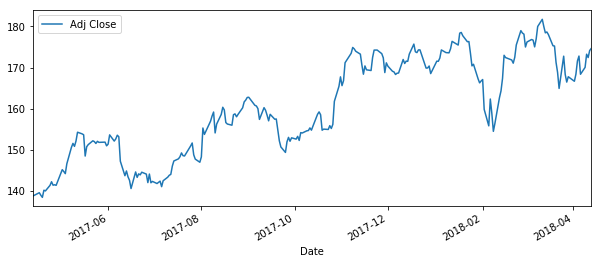

In [38]:
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))

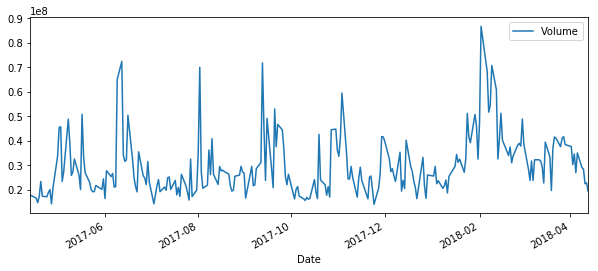

In [40]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

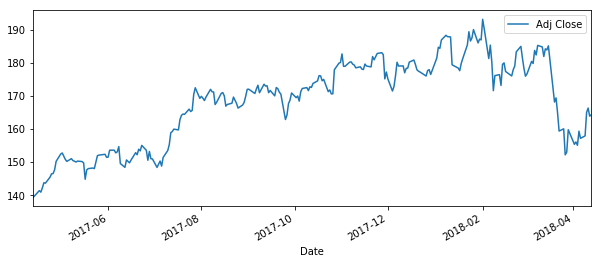

In [41]:
FB['Adj Close'].plot(legend = True, figsize = (10,4))

Moving Average

In [46]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [47]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2017-04-13,141.910004,142.380005,141.050003,141.050003,138.853424,17822900,NaN,NaN,NaN
2017-04-17,141.479996,141.880005,140.869995,141.830002,139.621262,16582100,NaN,NaN,NaN
2017-04-18,141.410004,142.039993,141.110001,141.199997,139.001068,14697500,NaN,NaN,NaN
2017-04-19,141.880005,142.000000,140.449997,140.679993,138.489166,17328400,NaN,NaN,NaN
2017-04-20,141.220001,142.919998,141.160004,142.440002,140.221771,23319600,NaN,NaN,NaN


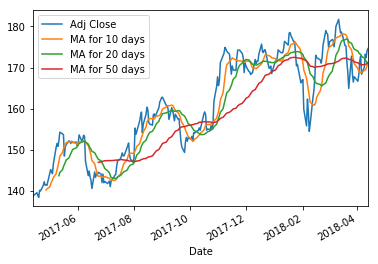

In [49]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B9A64034A8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001B9A651E588>], dtype=object)

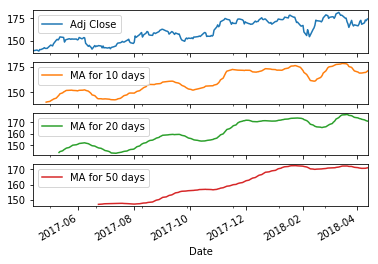

In [52]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = True)

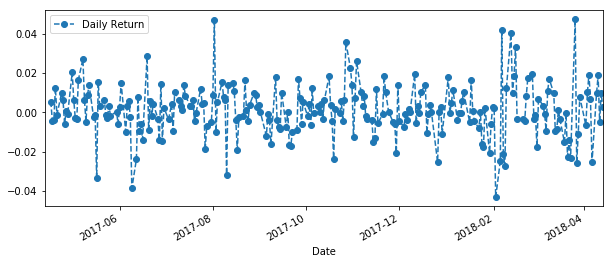

In [60]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(marker = 'o', linestyle = '--', figsize = (10,4), legend = True)

In [61]:
# Distplot allows us to put two plots on top of each other

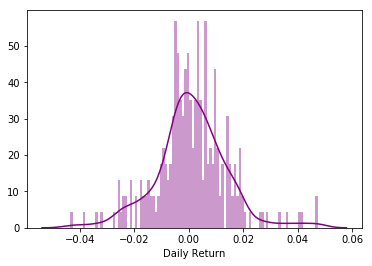

In [63]:
import seaborn as sns
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color= 'purple')

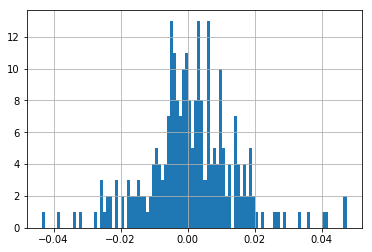

In [64]:
AAPL['Daily Return'].hist(bins = 100)

In [67]:
closing_df = data.get_data_yahoo(tech_list, start, end)['Adj Close']

[*********************100%***********************]  5 of 5 downloaded


In [68]:
closing_df.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2017-04-13,138.853424,884.669983,139.389999,823.559998,63.617741
2017-04-17,139.621262,901.989990,141.419998,837.169983,64.136871
2017-04-18,139.001068,903.780029,140.960007,836.820007,64.048721
2017-04-19,138.489166,899.200012,142.270004,838.210022,63.705902
2017-04-20,140.221771,902.059998,143.800003,841.650024,64.156464


In [69]:
tech_rets = closing_df.pct_change()

In [70]:
tech_rets.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2017-04-13,NaN,NaN,NaN,NaN,NaN
2017-04-17,0.005530,0.019578,0.014563,0.016526,0.008160
2017-04-18,-0.004442,0.001985,-0.003253,-0.000418,-0.001374
2017-04-19,-0.003683,-0.005068,0.009293,0.001661,-0.005352
2017-04-20,0.012511,0.003181,0.010754,0.004104,0.007073


In [71]:
tech_rets.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2017-04-13,NaN,NaN,NaN,NaN,NaN
2017-04-17,0.005530,0.019578,0.014563,0.016526,0.008160
2017-04-18,-0.004442,0.001985,-0.003253,-0.000418,-0.001374
2017-04-19,-0.003683,-0.005068,0.009293,0.001661,-0.005352
2017-04-20,0.012511,0.003181,0.010754,0.004104,0.007073


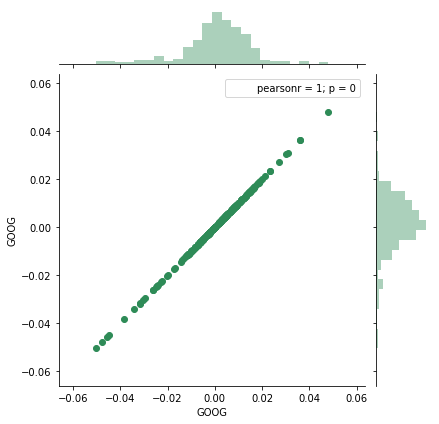

In [72]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

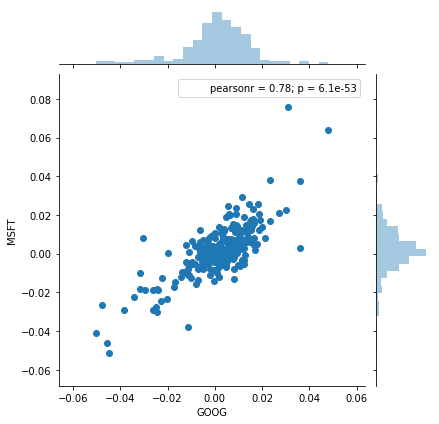

In [73]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind = 'scatter' )

    The Personr value gives a sense of how correlated the daily percentage returns are.

In [74]:
tech_rets.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2017-04-13,NaN,NaN,NaN,NaN,NaN
2017-04-17,0.005530,0.019578,0.014563,0.016526,0.008160
2017-04-18,-0.004442,0.001985,-0.003253,-0.000418,-0.001374
2017-04-19,-0.003683,-0.005068,0.009293,0.001661,-0.005352
2017-04-20,0.012511,0.003181,0.010754,0.004104,0.007073


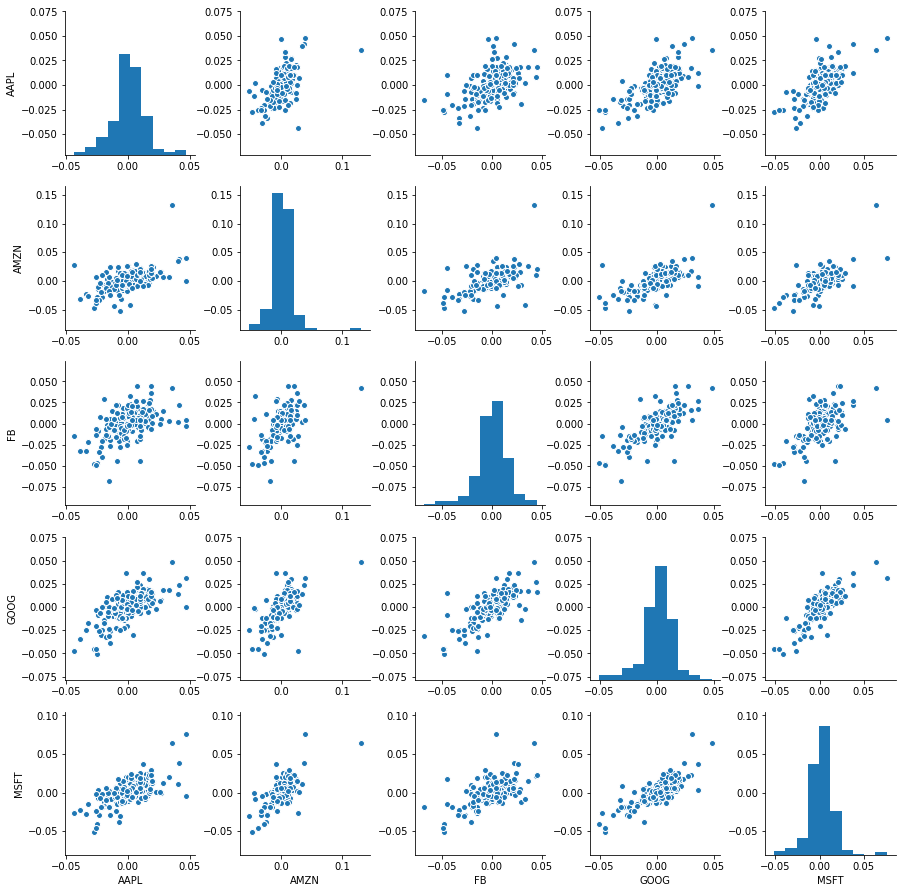

In [77]:
sns.pairplot(tech_rets.dropna())

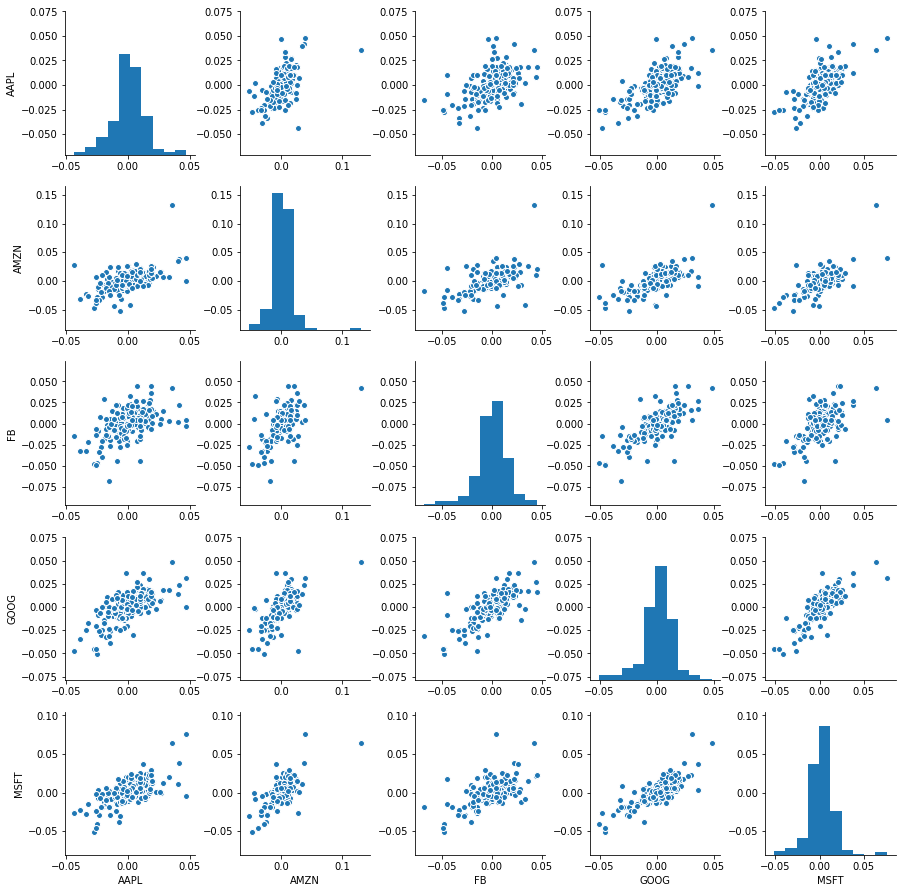

In [78]:
returns_fig = sns.pairplot(tech_rets.dropna())

In [80]:
import matplotlib.pyplot as plt

In [90]:
corr = tech_rets.corr()

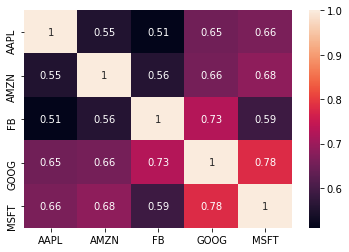

In [92]:
sns.heatmap(corr, annot = True)

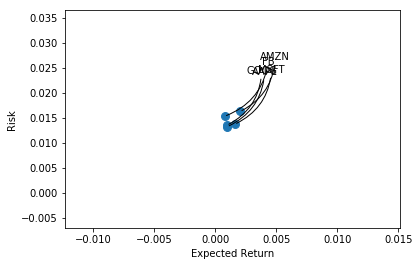

In [99]:
area = np.pi * 20
plt.scatter(tech_rets.mean(), tech_rets.std(), s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(tech_rets.columns, tech_rets.mean(), tech_rets.std()):
    plt.annotate(label, xy = (x,y), xytext = (50,50), textcoords = 'offset points', ha = 'right', va = 'bottom', 
                 arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3'))

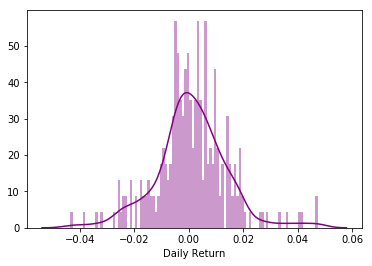

In [100]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color= 'purple')

In [101]:
tech_rets['AAPL'].quantile(0.05)

-0.022030926644797888